# DO not read

In [1]:
!pip install torch==2.4.0
!pip install botocore
!pip install peft
!pip install openpyxl
!pip install plotly
!pip install scikit-learn
!pip install transformers==4.43.3
!pip install sentence-transformers==3.0.1
!pip install stanza==1.8.2
!pip install s3fs


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip



In [2]:
!pip install ../.

Processing /mnt/c/Users/Mikalai_Pechaneu/Work/dial-rag-eval/nli-branch/dial-rag-eval
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for aidial-rag-eval: filename=aidial_rag_eval-0.0.0-py3-none-any.whl size=32836 sha256=6b08460f5c8881086bb20aeb0e5dd9fcfef41af6082bf6228a48400e18bf3ecd
  Stored in directory: /home/mikalai/.cache/pip/wheels/d8/83/6f/39719d07b12898443fb1709d9f0d11a4bc04cc7c0ba580049e
Successfully built aidial-rag-eval
  Attempting uninstall: aidial-rag-eval
    Found existing installation: aidial-rag-eval 0.0.0
    Uninstalling aidial-rag-eval-0.0.0:
      Successfully uninstalled aidial-rag-eval-0.0.0

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np

from aidial_rag_eval import dial_rag_eval, evaluate
from aidial_rag_eval.answer_nli.inference.ans_ref_models import LLMAnswerRefusalModel
import os
from langchain_openai import ChatOpenAI, OpenAIEmbeddings, AzureChatOpenAI

In [4]:
from s3fs.core import S3FileSystem

os.environ["AWS_DEFAULT_PROFILE"] = "rtc"
os.environ["AWS_PROFILE"] = "rtc"
s3 = S3FileSystem(anon=False)

In [5]:
import json

In [6]:
azure_llm = AzureChatOpenAI(
    model="gemini-1.5-flash-001",
    # model="Llama-3-8B-Instruct",
    # model="gemini-1.5-flash-002",
    # model="gpt-4o-mini-2024-07-18",
    api_key=os.environ.get("OPENAI_API_KEY"),
    api_version="2023-03-15-preview",
    azure_endpoint=os.environ.get("OPENAI_PROXY_URL", "https://dev-dial-core.staging.deltixhub.io/"),
    max_tokens=4096,
    timeout=600,
    temperature=0,
    seed=None,
    disable_streaming=True
)

In [7]:
ground_truth_path = "./data3/rag_chart/datasets/ground_truth/rc_gt.parquet"

In [53]:
import os
orig_path = "./data3/rag_chart/original/splited"
answer_path = "./data3/rag_chart/datasets/answers"

In [54]:
eval_path = "./data3/rag_chart/datasets/evaluation"

In [55]:
gemini_eval_fns = ['chat_gpt4o.parquet',
 'dial_rag_gpt4omini.parquet',
 'gemini_pro_1.5.parquet',
 'ms_colpilot_licenced.parquet',
 'ms_copilot.parquet'
]

In [56]:
# gemini_eval_fns = ['llama_chat_gpt4o.parquet',
#  'llama_dial_rag_gpt4omini.parquet',
#  'llama_gemini_pro_1.5.parquet',
#  'llama_ms_colpilot_licenced.parquet',
#  'llama_ms_copilot.parquet'
# ]

In [ ]:
# gemini_eval_fns = ['simple_chat_gpt4o.parquet',
#  'simple_dial_rag_gpt4omini.parquet',
#  'simple_gemini_pro_1.5.parquet',
#  'simple_ms_colpilot_licenced.parquet',
#  'simple_ms_copilot.parquet'
# ]

In [57]:
orignal_fns = ['chat_gpt4o.xlsx',
 'dial_rag_gpt4omini.xlsx',
 'gemini_pro_1.5.xlsx',
 'ms_colpilot_licenced.xlsx',
 'ms_copilot.xlsx'
]

In [58]:
df = pd.read_excel("./data3/rag_chart/original/splited/chat_gpt4o.xlsx")
notna_idxes = pd.notna(df["gt_answer"])
df_notna = df[notna_idxes].reset_index(drop=True)

In [59]:
evals_with_values = dict()
for f_name_orig, f_name_eval in zip(orignal_fns, gemini_eval_fns):
    print(f_name_orig, f_name_eval)
    df_e = pd.read_parquet(os.path.join(eval_path, f_name_eval))
    df_a = pd.read_excel(os.path.join(orig_path, f_name_orig))
    df_a = df_a[notna_idxes].reset_index(drop=True).drop([18]).reset_index(drop=True)
    df_e["value"] = df_a["value"]
    evals_with_values[f_name_eval] = df_e

chat_gpt4o.xlsx chat_gpt4o.parquet
dial_rag_gpt4omini.xlsx dial_rag_gpt4omini.parquet
gemini_pro_1.5.xlsx gemini_pro_1.5.parquet
ms_colpilot_licenced.xlsx ms_colpilot_licenced.parquet
ms_copilot.xlsx ms_copilot.parquet


In [60]:
import itertools

In [61]:
res_metrics = []
res_metrics2 = []
values_ = []
for file_name in evals_with_values:
    res_metrics.append(evals_with_values[file_name]["answer_to_ground_truth_answer_nli"].values)
    res_metrics2.append(((evals_with_values[file_name]["answer_to_ground_truth_answer_nli"] + evals_with_values[file_name]["ground_truth_answer_to_answer_nli"]) / 2).values)
    values_.append(evals_with_values[file_name]["value"].values)
res_metrics = np.asarray(list(itertools.chain(*res_metrics)))
res_metrics2 = np.asarray(list(itertools.chain(*res_metrics2)))
values_ = np.asarray(list(itertools.chain(*values_)))

In [62]:
df = pd.read_excel("./data3/rag_chart/original/dial_gemini_eval/dial_gemini_eval.xlsx")

In [63]:
df_eval = pd.read_parquet("./data3/rag_chart/datasets_gemini/evaluation/eval.parquet")

In [64]:
df_eval["value"] = df["value"]

In [65]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [66]:
def get_optimal_threshold(y_true, y_pred):
    scores = []
    for thresh in np.linspace(0, 1, num=100):
        scores.append((
            thresh, 
            accuracy_score(
                y_true,
                y_pred > thresh
            )
        ))
    thresh, score = max(scores, key=lambda x: x[1])
    optimal_scores = [(t, s) for t, s in scores if np.abs(s - score) < 1e-5]
    return np.mean([t for t, s in optimal_scores])

In [243]:
import plotly.express as px
from sklearn.metrics import roc_curve, auc


def plot_roc_auc_curve(y_true, y_pred, title="Red vs rest ROC Curve"):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc_score_str = f'(AUC={auc(fpr, tpr):.4f})'
    
    fig = px.area(
        x=fpr, y=tpr,
        title=title + auc_score_str,
        labels=dict(x='False Positive Rate', y='True Positive Rate'),
        width=700, height=500
    )
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
    
    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    fig.show()

In [68]:
import plotly.express as px

def plot_confusion_matrix(tp, fp, fn, tn, title):
    z = [[tp, fp],
         [fn, tn]
        ]
    
    fig = px.imshow(z, x=["Pos", "Neg"], y=["Pos", "Neg"], labels=dict(x="actual values", y="predicted values"), text_auto=True, title=title)
    fig.show()

In [323]:
def pair_bootstrap(y_true, y_pred, N, stats_func, lbp=2.5, ubp=97.5, size=None):
    if size is None:
        size = len(y_true)
    results = []
    for _ in range(N):
        idxes = np.random.choice(np.arange(len(y_true)), size=size, replace=True)
        results.append(stats_func(y_true[idxes], y_pred[idxes]))
    lower_bound = np.percentile(results, lbp)
    upper_bound = np.percentile(results, ubp)
    return results, lower_bound, upper_bound

In [70]:
azure_llm_gpt_4o = AzureChatOpenAI(
    model="gpt-4o",
    api_key=os.environ.get("OPENAI_API_KEY"),
    api_version="2023-03-15-preview",
    azure_endpoint=os.environ.get("OPENAI_PROXY_URL", "https://dev-dial-core.staging.deltixhub.io/"),
    max_tokens=4096,
    timeout=600,
    temperature=0,
    seed=None,
    disable_streaming=True
)

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
from scipy.stats.distributions import beta, betabinom

def get_beta_distribution(values):
    x_mean = values.mean()
    x_var =  values.var()
    alpha_mm = x_mean * ((x_mean * (1 - x_mean)) / x_var - 1)
    beta_mm = (1 - x_mean) * ((x_mean * (1 - x_mean)) / x_var - 1)
    return beta(alpha_mm, beta_mm)


In [73]:
def get_betabinom_alpha(m1, m2, N):
    return (N * m1 - m2) / (N * (m2 / m1 - m1 - 1) + m1)

def get_betabinom_beta(m1, m2, N):
    return (N - m1) * (N - m2 / m1) / (N * (m2 / m1 - m1 - 1) + m1)

In [74]:
from scipy.stats.distributions import beta, betabinom

def values_to_betabinom(values, betabinom_xrange):
    return np.argmin(np.abs(values[None, :] - betabinom_xrange[:, None]), 0)

def get_betabinom_distribution(values, N=9):
    betabinom_xrange = np.linspace(0, 1, N + 1)
    values_bb = values_to_betabinom(values, betabinom_xrange)
    m1 = values_bb.mean()
    m2 = (values_bb ** 2).mean()
    alpha_bb = get_betabinom_alpha(m1, m2, N)
    beta_bb = get_betabinom_beta(m1, m2, N)

    return betabinom(N, alpha_bb, beta_bb), values_bb


In [75]:
import plotly.graph_objects as go

def draw_beta_distr(beta_distr1, beta_distr2):
    x_space = np.linspace(1e-20, 1. - 1e-20, 300)
    pdf0 = beta_distr1.pdf(x_space)
    pdf1 = beta_distr2.pdf(x_space)
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_space, y=pdf0,
                        mode='lines',
                        name='0 class',
                            fill="tozeroy"))
    fig.add_trace(go.Scatter(x=x_space, y=pdf1,
                        mode='lines',
                        name='1 class',
                            fill="tozeroy",
                            ))
    fig.update_layout(
        title=dict(
            text='0 and 1 class beta distribution(method of moments)'
        ),
        width=800,
        height=500,
    )
    
    fig.update_yaxes(range=[0, 1])
    
    fig.update_yaxes(range=[0, 5])
    
    fig.show()

In [76]:
def draw_betabinom_distr(betabinom_distr0, betabinom_distr1, N=9):
    betabinom_xrange = np.linspace(0, 1, N + 1)
    pmf_mm_0 = betabinom_distr0.pmf(np.arange(N + 1))
    pmf_mm_1 = betabinom_distr1.pmf(np.arange(N + 1))
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=betabinom_xrange, y=pmf_mm_0,
                        mode='lines',
                        name='0 class',
                            fill="tozeroy"))
    fig.add_trace(go.Scatter(x=betabinom_xrange, y=pmf_mm_1,
                        mode='lines',
                        name='1 class',
                            fill="tozeroy",
                            ))
    fig.update_layout(
        title=dict(
            text='0 and 1 class betabinom distribution(method of moments)'
        ),
        width=800,
        height=500,
    )
    
    fig.update_yaxes(range=[0, 1])
    
    fig.update_yaxes(range=[0, 1])
    
    fig.show()

In [77]:
def get_prob_error(bet_distr0, bet_distr1, p0_class, p1_class, threshold):
    return p0_class * (1 - bet_distr0.cdf(threshold)) + p1_class * (bet_distr1.cdf(threshold))

In [78]:
def one_class_roc_auc_score(y_true, y_pred):
    if len(np.unique(y_true)) < 2:
        return 1.
    return roc_auc_score(y_true, y_pred)

def hist_with_ci(scores, lb, ub):
    fig = go.Figure(data=[go.Histogram(x=scores)])
    fig.add_vline(x=lb, line_color="red")
    fig.add_vline(x=ub, line_color="red")
    fig.update_layout(
        width=700,
        height=500,
    )
    fig.show()

In [79]:
def beta_stats_func(x, y):
    x_mean_0 = x.mean()
    x_var_0 =  x.var()
    x_mean_1 = y.mean()
    x_var_1 = y.var()
    
    alpha_mm_0 = x_mean_0 * ((x_mean_0 * (1 - x_mean_0)) / x_var_0 - 1)
    beta_mm_0 = (1 - x_mean_0) * ((x_mean_0 * (1 - x_mean_0)) / x_var_0 - 1)
    
    alpha_mm_1 = x_mean_1 * ((x_mean_1 * (1 - x_mean_1)) / x_var_1 - 1)
    beta_mm_1 = (1 - x_mean_1) * ((x_mean_1 * (1 - x_mean_1)) / x_var_1 - 1)

    beta_distr_mm_0 = beta(alpha_mm_0, beta_mm_0)
    beta_distr_mm_1 = beta(alpha_mm_1, beta_mm_1)

    x_space = np.linspace(1e-20, 1. - 1e-20, 300)
    
    pdf_mm_0 = beta_distr_mm_0.pdf(x_space)
    pdf_mm_1 = beta_distr_mm_1.pdf(x_space)
    p_error = p0_class * (1 - beta_distr_mm_0.cdf(threshold_red_vs_rest)) + p1_class * (beta_distr_mm_1.cdf(threshold_red_vs_rest))
    return p_error

In [80]:
def betabinom_stats_func(x, y):
    N = 9
    threshold = threshold_rvr_placeholder
    
    betabinom_mm_0, eval_values_bb0 = get_betabinom_distribution(x, 9)
    betabinom_mm_1, eval_values_bb1 = get_betabinom_distribution(y, 9)
    
    p_error = p0_class * (betabinom_mm_0.pmf(np.arange(N + 1))[betabinom_xrange > threshold]).sum() +\
        p1_class * (betabinom_mm_1.pmf(np.arange(N + 1))[betabinom_xrange < threshold]).sum()
    return 1. - p_error

In [81]:
from scipy.stats import permutation_test, bootstrap, ttest_rel, ttest_1samp

In [82]:
res_metric = df_eval["answer_to_ground_truth_answer_nli"]
res_metric2 = (df_eval["answer_to_ground_truth_answer_nli"] + df_eval["ground_truth_answer_to_answer_nli"]) / 2

In [146]:
threshold_red_vs_rest = get_optimal_threshold(df_eval["value"] > 0.5, res_metric2)
# threshold_red_vs_rest = get_optimal_threshold(df_eval["value"] > 0.5, res_metric)
threshold_red_vs_rest

0.2676767676767677

In [84]:
beta_distr0 = get_beta_distribution(res_metric2[df_eval["value"] == 0])
beta_distr1 = get_beta_distribution(res_metric2[df_eval["value"] != 0])

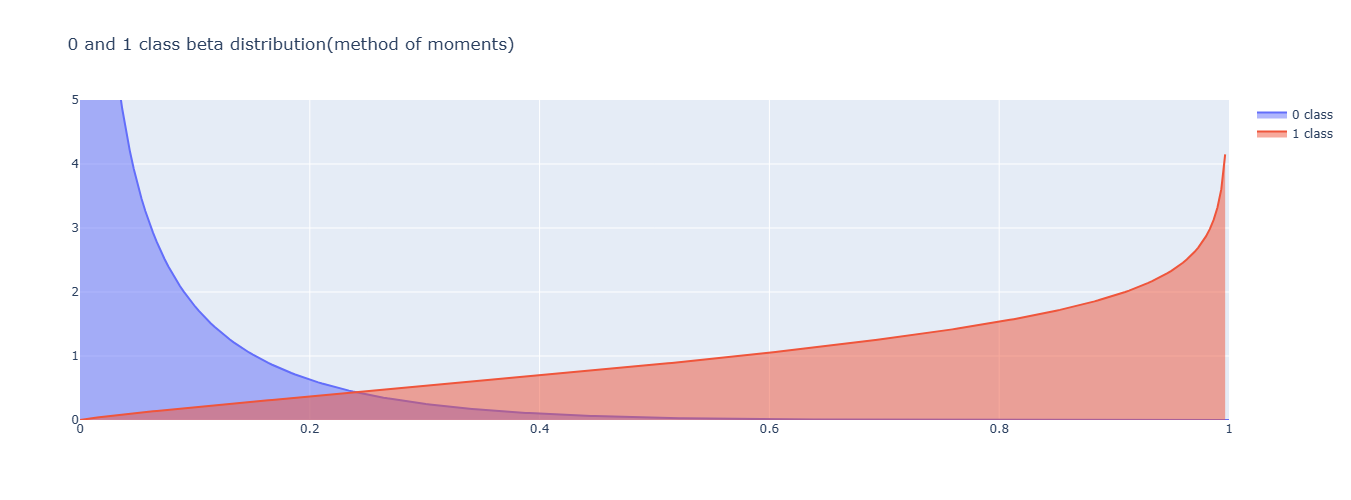

In [85]:
draw_beta_distr(beta_distr0, beta_distr1)

In [86]:
from scipy.stats import kstest

In [87]:
betabinom_distr0, eval_values_bb0 = get_betabinom_distribution(res_metric2[df_eval["value"] == 0].values, 9)
betabinom_distr1, eval_values_bb1 = get_betabinom_distribution(res_metric2[df_eval["value"] != 0].values, 9)

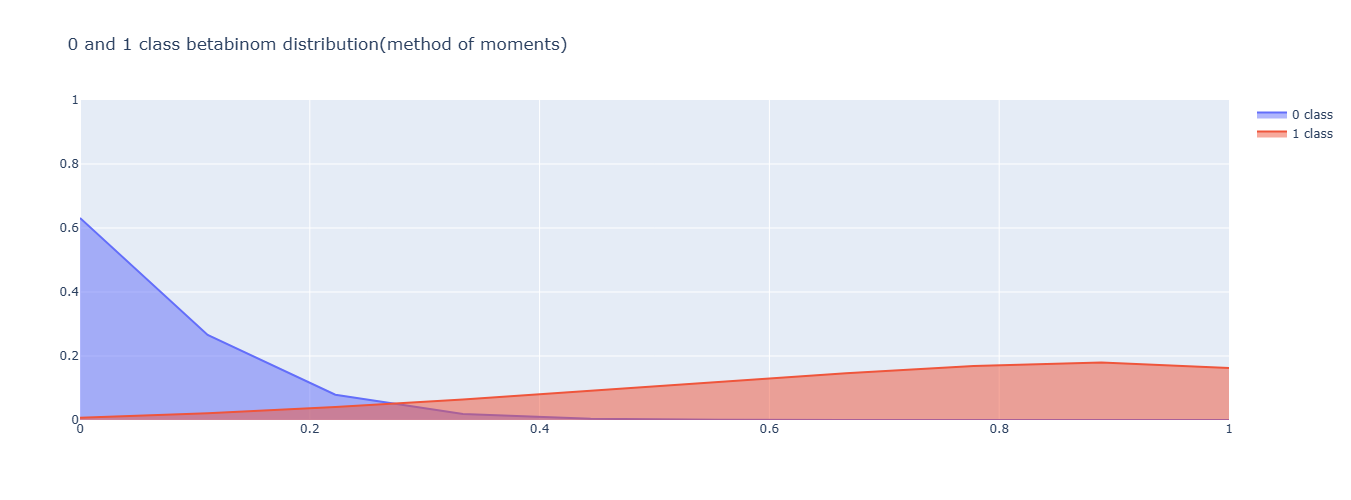

In [88]:
draw_betabinom_distr(betabinom_distr0, betabinom_distr1)

In [89]:
def get_prob_error_betabinom(betabinom_distr0, betabinom_distr1, p0_class, p1_class, threshold, N=9):
    betabinom_xrange = np.linspace(0, 1, N + 1)
    return p0_class * (betabinom_distr0.pmf(np.arange(N + 1))[betabinom_xrange > threshold]).sum() +\
        p1_class * (betabinom_distr1.pmf(np.arange(N + 1))[betabinom_xrange < threshold]).sum()

In [90]:
get_prob_error_betabinom(betabinom_distr0, betabinom_distr1, (df_eval["value"] == 0).mean(), (df_eval["value"] != 0).mean(), 0.25)

0.05782991382034665

In [91]:
def get_optimal_threshold_betabinom_distr(betabinom_distr0, betabinom_distr1, p0_class, p1_class):
    scores = []
    for thresh in np.linspace(0.001, 1, num=100):
        scores.append((thresh, 1. - get_prob_error_betabinom(betabinom_distr0, betabinom_distr1, p0_class, p1_class, thresh)))
    thresh, score = max(scores, key=lambda x: x[1])
    optimal_scores = [(t, s) for t, s in scores if np.abs(s - score) < 1e-5]
    return np.mean([t for t, s in optimal_scores])

In [92]:
threshold_red_vs_rest_betabinom = get_optimal_threshold_betabinom_distr(betabinom_distr0, betabinom_distr1, (df_eval["value"] == 0).mean(), (df_eval["value"] != 0).mean())
threshold_red_vs_rest_betabinom

0.16245454545454543

In [93]:
def get_optimal_threshold_beta_distr(beta_distr0, beta_distr1, p0_class, p1_class):
    scores = []
    for thresh in np.linspace(0, 1, num=100):
        scores.append((thresh, 1. - get_prob_error(beta_distr0, beta_distr1, p0_class, p1_class, thresh)))
    thresh, score = max(scores, key=lambda x: x[1])
    optimal_scores = [(t, s) for t, s in scores if np.abs(s - score) < 1e-5]
    return np.mean([t for t, s in optimal_scores])

In [94]:
threshold_red_vs_rest_beta = get_optimal_threshold_beta_distr(beta_distr0, beta_distr1, (df_eval["value"] == 0).mean(), (df_eval["value"] == 1).mean())
threshold_red_vs_rest_beta

0.25252525252525254

## Validation Dataset:

### confusion matrix

In [95]:
tn, fp, fn, tp = confusion_matrix(df_eval["value"] > 0.5, res_metric2 > threshold_red_vs_rest).ravel()
plot_confusion_matrix(tp, fp, fn, tn, "Red vs rest")
tn, fp, fn, tp = confusion_matrix((df_eval["value"] > 0.5)[df_eval["value"] != 1], (res_metric2 > threshold_red_vs_rest)[df_eval["value"] != 1]).ravel()
plot_confusion_matrix(tp, fp, fn, tn, "Red vs green")
tn, fp, fn, tp = confusion_matrix((df_eval["value"] > 0.5)[df_eval["value"] != 2], (res_metric2 > threshold_red_vs_rest)[df_eval["value"] != 2]).ravel()
plot_confusion_matrix(tp, fp, fn, tn, "Red vs yellow")

### ROC AUC

In [96]:
plot_roc_auc_curve(df_eval["value"] > 0.5, res_metric2)

In [97]:
scores, lb, ub = pair_bootstrap(df_eval["value"] > 0.5, res_metric2, 10000, one_class_roc_auc_score)

In [98]:
lb, ub

(0.9210526315789473, 1.0)

In [99]:
hist_with_ci(scores, lb, ub)

### accuracy

In [100]:
accuracy_score(
    df_eval["value"] > 0.5,
    res_metric2 > threshold_red_vs_rest
)

0.96

In [101]:
scores, lb, ub = pair_bootstrap(df_eval["value"] > 0.5, res_metric2 > threshold_red_vs_rest, 10000, accuracy_score)

In [102]:
lb, ub

(0.88, 1.0)

In [103]:
hist_with_ci(scores, lb, ub)

In [147]:
metrics_placeholder2 = res_metrics
metrics_placeholder = res_metrics2
threshold_rvr_placeholder = threshold_red_vs_rest
threshold_rvr_placeholder2 = 0.1225296442687747

# You can start read

## Goal

Evaluate the performance of the algorithm on real data that has been labeled by humans.

## Agenda

* **A)** Description of datasets and experiments.
* **B)** Confusion matrixes, AUC ROC scores, accuracy scores.
* **C)** Stats.

# A)

## Overview

Two Excel files were provided:

1. `rag_chart_and_tables_evaluation.xlsx`
2. `DIAL_gemini_evaluation_DBG.xlsx`

### Common Properties

Both files contain the following elements:
- Question
- Answer
- Ground truth answer

**Note:** Context is absent. Each RAG (Retrieval-Augmented Generation) answer is marked with red, yellow, or green, indicating increasing quality.

### File Specifics

#### 1. `rag_chart_and_tables_evaluation.xlsx`

- Contains five answers from different RAGs for each question.
- Ground truth answers are short or monosyllabic.
- GPT-4o was used to combine the question with the ground truth answer to make it more detailed.

#### 2. `DIAL_gemini_evaluation_DBG.xlsx`

- Contains only one RAG answer per question.
- Ground truth answers are detailed and comparable in length to the RAG answers.

## Evaluation Strategy

The quality of the algorithm will be assessed against human annotations. Specifically, we will evaluate how well the algorithm distinguishes between red vs. rest (i.e., red-marked answers are classified as class zero, while yellow and green are classified as class one).

### Decision Rule

We need to establish a decision rule based on our algorithm:

- **Metric:** `answer_to_ground_truth_answer_nli` (`gt_nli`) vs. `(answer_to_ground_truth_answer_nli + ground_truth_answer_to_answer_nli) / 2`  (`mean_nli`)
- **Threshold:** The metric boundary to separate red and rest classes.

For fairness, the decision rule should be selected on a separate validation set.

Optimal threshold for `mean_nli` is **0.2677**. Optimal threshold for `gt_nli` is **0.123**.

### Validation and Test Sets

- **Validation Set:** `DIAL_gemini_evaluation_DBG.xlsx`
  - **Decision Rule:**
    - **Metric:** `mean_nli`
    - **Threshold:** 0.2677

- **Test Set:** `rag_chart_and_tables_evaluation.xlsx`

- **Accuracy-Based Threshold**: The optimal threshold for accuracy is **0.2677**.
- **Classification Error Threshold**: When fitting a beta distribution to the classes, the optimal threshold for minimizing error is **0.2525**.

The threshold based on accuracy was chosen because it is the initial evaluation on the dataset. The second evaluation involves finding the parameters of the distribution on the dataset, and only then is the error calculated.

### Rationale for Dataset Selection

I arbitrarily chose `DIAL_gemini_evaluation_DBG.xlsx` as the validation set and `rag_chart_and_tables_evaluation.xlsx` as the test set because:

1. It presents a more challenging test for our algorithm's quality, as the decision rule from `DIAL_gemini_evaluation_DBG.xlsx` is not optimal for `rag_chart_and_tables_evaluation.xlsx`.
2. I want to preserve the data in `rag_chart_and_tables_evaluation.xlsx` for the test set, as it is interesting due to the presence of different quality answers to the same question.

### Terminology

- **Validation Dataset:** Refers to `DIAL_gemini_evaluation_DBG.xlsx`
- **Test Dataset:** Refers to `rag_chart_and_tables_evaluation.xlsx`

## Answer Annotation Statistics:

## Validation Dataset:

- Red answers: 6
- Yellow answers: 5
- Green answers: 14

## Test Dataset:

- Red answers: 40
- Yellow answers: 21
- Green answers: 69

# B)

## Test dataset

### confusion matrix(mean_nli)

In [144]:
11 /90, 5 / 40

(0.12222222222222222, 0.125)

In [106]:
tn, fp, fn, tp = confusion_matrix(values_ > 0.5, metrics_placeholder > threshold_rvr_placeholder).ravel()
plot_confusion_matrix(tp, fp, fn, tn, "Red vs rest")
tn, fp, fn, tp = confusion_matrix((values_ > 0.5)[values_ != 1], (metrics_placeholder > threshold_rvr_placeholder)[values_ != 1]).ravel()
plot_confusion_matrix(tp, fp, fn, tn, "Red vs green")
tn, fp, fn, tp = confusion_matrix((values_ > 0.5)[values_ != 2], (metrics_placeholder > threshold_rvr_placeholder)[values_ != 2]).ravel()
plot_confusion_matrix(tp, fp, fn, tn, "Red vs yellow")

### confusion matrix(gt_nli)

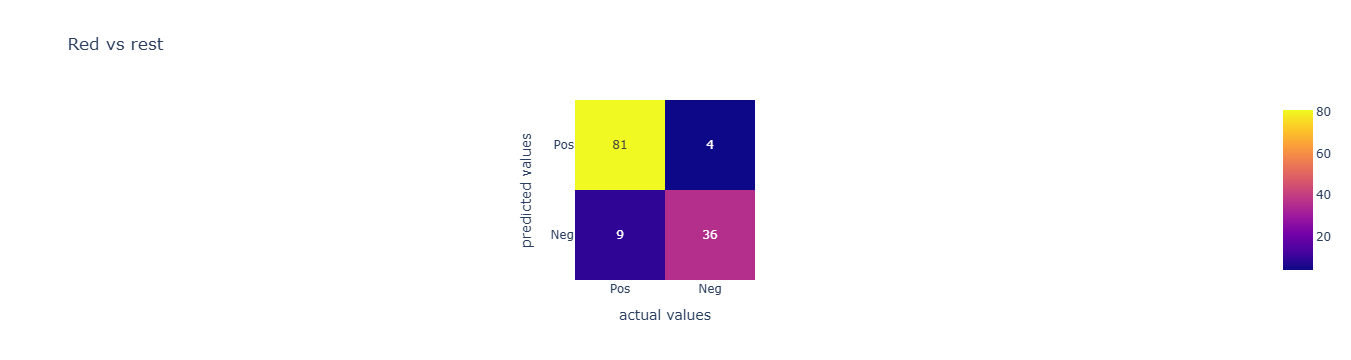

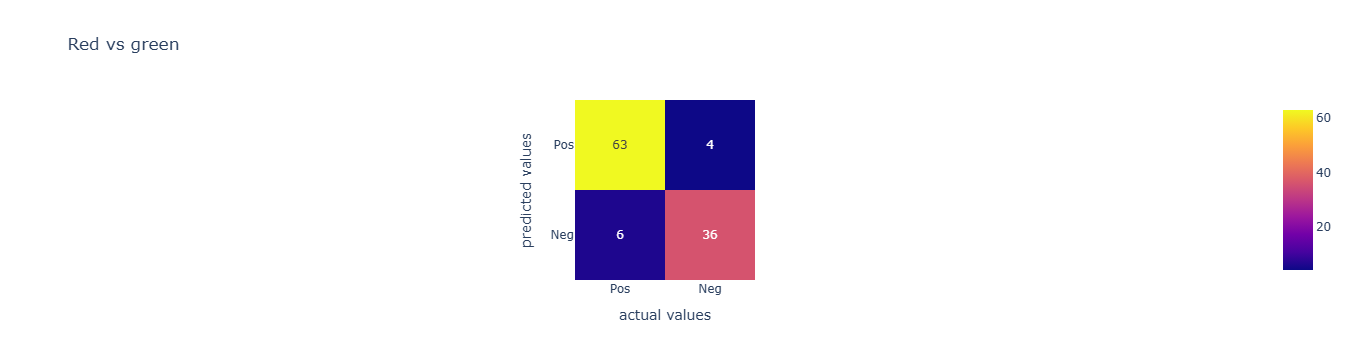

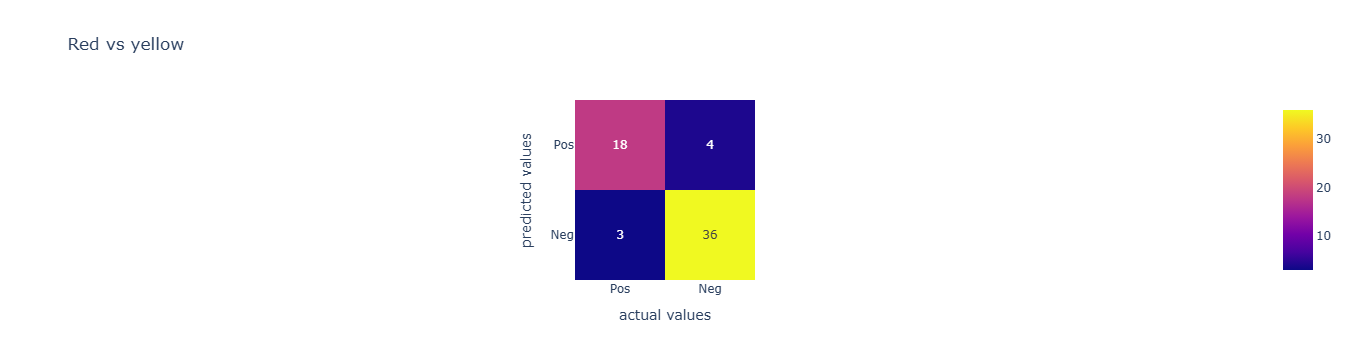

In [148]:
tn, fp, fn, tp = confusion_matrix(values_ > 0.5, metrics_placeholder2 > threshold_rvr_placeholder2).ravel()
plot_confusion_matrix(tp, fp, fn, tn, "Red vs rest")
tn, fp, fn, tp = confusion_matrix((values_ > 0.5)[values_ != 1], (metrics_placeholder2 > threshold_rvr_placeholder2)[values_ != 1]).ravel()
plot_confusion_matrix(tp, fp, fn, tn, "Red vs green")
tn, fp, fn, tp = confusion_matrix((values_ > 0.5)[values_ != 2], (metrics_placeholder2 > threshold_rvr_placeholder2)[values_ != 2]).ravel()
plot_confusion_matrix(tp, fp, fn, tn, "Red vs yellow")

### ROC AUC (mean_nli)

In [107]:
plot_roc_auc_curve(values_ > 0.5, metrics_placeholder)

In [108]:
scores, lb, ub = pair_bootstrap(values_ > 0.5, metrics_placeholder, 10000, one_class_roc_auc_score)

In [109]:
lb, ub

(0.8452767857142858, 0.9568581671860038)

## Bootstrap AUC-ROC Score on the Test Dataset(mean_nli)

We are 95 percent confident that the AUC-ROC score on a dataset of this nature ranges from 0.85 to 0.96.

In [110]:
hist_with_ci(scores, lb, ub)


### ROC AUC (gt_nli)

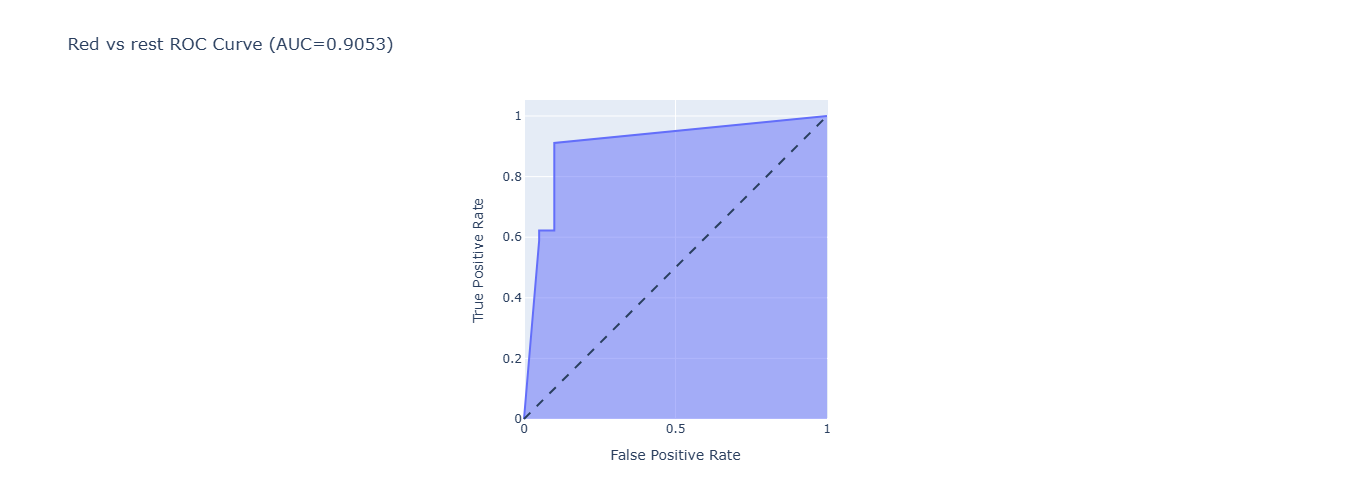

In [149]:
plot_roc_auc_curve(values_ > 0.5, metrics_placeholder2)

In [150]:
scores, lb, ub = pair_bootstrap(values_ > 0.5, metrics_placeholder2, 10000, one_class_roc_auc_score)

In [151]:
lb, ub

(0.8431366296518606, 0.9602632711008029)

## Bootstrap AUC-ROC Score on the Test Dataset(gt_nli)

We are 95 percent confident that the AUC-ROC score on a dataset of this nature ranges from 0.84 to 0.96.

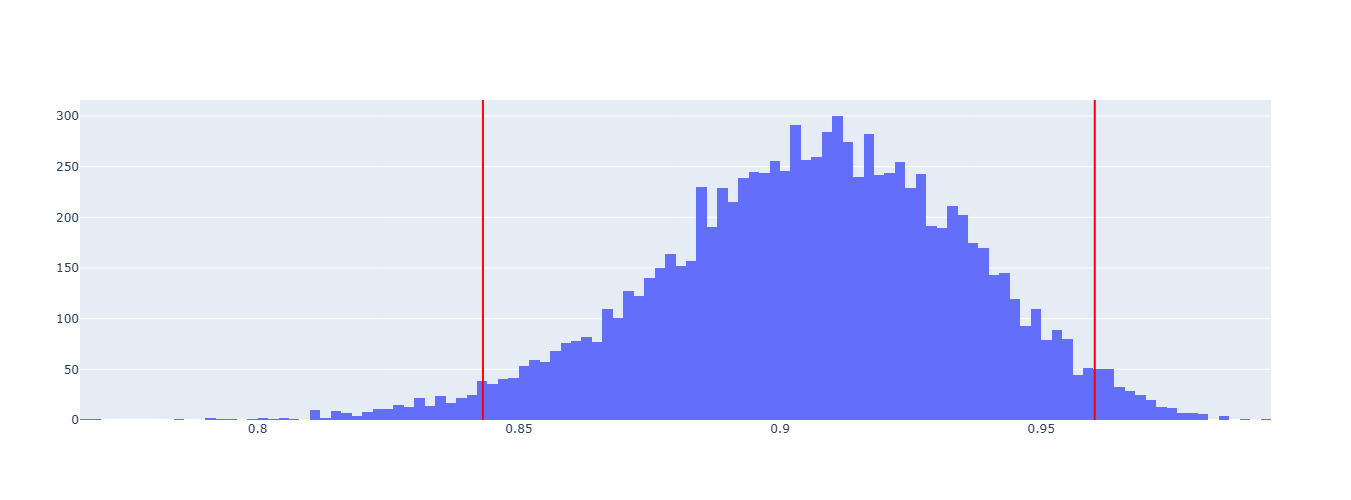

In [152]:
hist_with_ci(scores, lb, ub)

### accuracy(mean_nli)

In [111]:
accuracy_score(
    values_ > 0.5,
    metrics_placeholder > threshold_rvr_placeholder
)

0.8769230769230769

In [112]:
scores, lb, ub = pair_bootstrap(
    values_ > 0.5,
    metrics_placeholder > threshold_rvr_placeholder, 10000, accuracy_score
)

In [113]:
lb, ub

(0.8153846153846154, 0.9307692307692308)

## Bootstrap Accuracy Score on the Test Sample(mean_nli)

We are 95% confident that the accuracy on a dataset of this nature varies from 0.815 to 0.93.

In [114]:
hist_with_ci(scores, lb, ub)

### accuracy(gt_nli)

In [156]:
accuracy_score(
    values_ > 0.5,
    metrics_placeholder2 > threshold_rvr_placeholder2
)

0.9

In [157]:
scores, lb, ub = pair_bootstrap(
    values_ > 0.5,
    metrics_placeholder2 > threshold_rvr_placeholder2, 10000, accuracy_score
)

In [158]:
lb, ub

(0.8461538461538461, 0.9461538461538461)

## Bootstrap Accuracy Score on the Test Sample(gt_nli)

We are 95% confident that the accuracy on a dataset of this nature varies from 0.846 to 0.946.

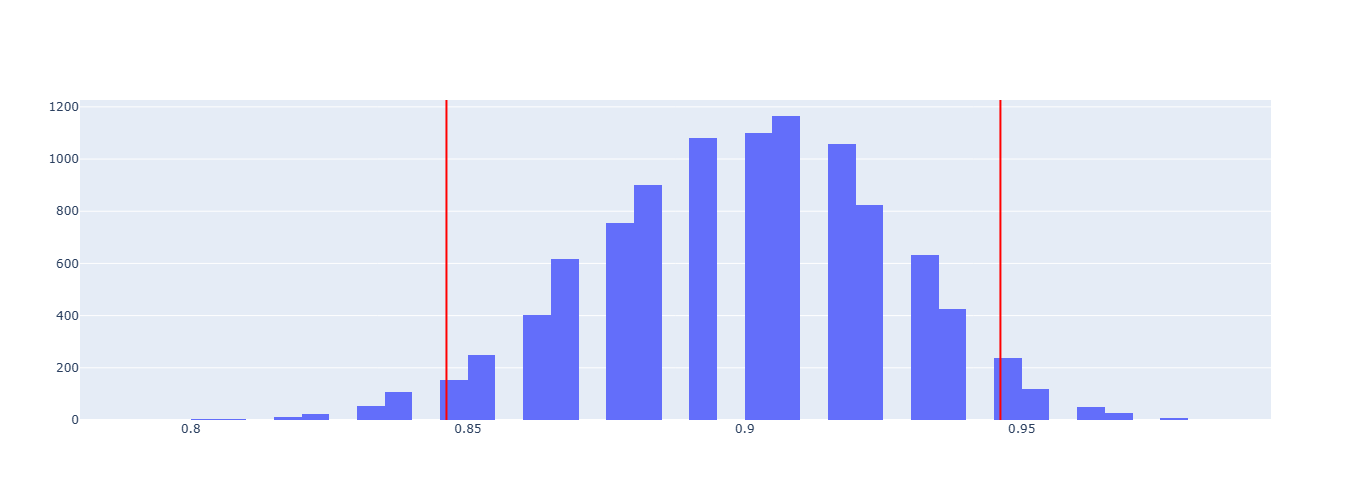

In [159]:
hist_with_ci(scores, lb, ub)

# C)

## 1) What is the probability that a worse answer will have a lower NLI score than a better answer?

We have a set of labeled answers to questions.

- **Left Side**: Answers labeled in red.
- **Right Side**: Answers labeled in yellow or green.

We will create all possible pairs of answers, with one answer from the left side and one from the right side.

A pair is considered correctly labeled if the NLI score of the left(read) answer is less than that of the right(yellow-green) answer.

### mean_nli
- Proportion of correctly labeled pairs: 0.8853
- Proportion of incorrectly labeled pairs: 0.1147

Among the incorrectly labeled pairs:
- Proportion with the same NLI: 0.0414
- Proportion where the worse answer has a higher NLI: 0.0733

In [115]:
((metrics_placeholder[values_ == 0][:, None] - metrics_placeholder[values_ != 0][None, :]).ravel() < 0).mean(),\
((metrics_placeholder[values_ == 0][:, None] - metrics_placeholder[values_ != 0][None, :]).ravel() > 0).mean()

(0.8852777777777778, 0.07333333333333333)

### gt_nli
- Proportion of correctly labeled pairs: 0.851
- Proportion of incorrectly labeled pairs: 0.149

Among the incorrectly labeled pairs:
- Proportion with the same NLI: 0.109
- Proportion where the worse answer has a higher NLI: 0.04

In [160]:
((metrics_placeholder2[values_ == 0][:, None] - metrics_placeholder2[values_ != 0][None, :]).ravel() < 0).mean(),\
((metrics_placeholder2[values_ == 0][:, None] - metrics_placeholder2[values_ != 0][None, :]).ravel() > 0).mean()

(0.8511111111111112, 0.04055555555555555)

## 2) What is the probability that a worse answer will have a lower score than a better answer when responding to a unclear question?

### Understanding the Clarity of Answers

We consider the answers to a question to be clear if:

- All answers are marked in red, or
- All answers are marked in yellow or green.

#### Analyzing Questions with Unclear Answers

For questions that do not have clear answers:

- There are both red answers and yellow-green answers.

We create all possible pairs of red(on one side) and yellow-green(on the other side) answers within each question.

A pair is considered correctly labeled if the NLI score of the left(read) answer is less than that of the right(yellow-green) answer.

### mean_nli

- Proportion of correctly labeled pairs of unclear answers: 0.75
- Proportion of incorrectly labeled pairs of unclear answers: 0.25

Among the incorrectly labeled pairs:
- Proportion with the same NLI: 0.162
- Proportion where the worse answer has a higher NLI: 0.088

In [116]:
pairs = []
for i in range(evals_with_values["chat_gpt4o.parquet"].shape[0]):
    reds, non_reds = [], []
    for file_name in evals_with_values:
        m = (evals_with_values[file_name]["answer_to_ground_truth_answer_nli"][i] + evals_with_values[file_name]["ground_truth_answer_to_answer_nli"][i]) / 2
        if evals_with_values[file_name]["value"][i] == 0:
            reds.append(m)
        else:
            non_reds.append(m)
    if reds and non_reds:
        for r in reds:
            for nr in non_reds:
                pairs.append((r, nr))
pairs = np.asarray(pairs)

In [117]:
(pairs[:, 0] < pairs[:, 1]).mean(), (pairs[:, 0] > pairs[:, 1]).mean()

(0.75, 0.08823529411764706)

### gt_nli

- Proportion of correctly labeled pairs of unclear answers: 0.54
- Proportion of incorrectly labeled pairs of unclear answers: 0.46

Among the incorrectly labeled pairs:
- Proportion with the same NLI: 0.397
- Proportion where the worse answer has a higher NLI: 0.0588

In [166]:
pairs = []
for i in range(evals_with_values["chat_gpt4o.parquet"].shape[0]):
    reds, non_reds = [], []
    for file_name in evals_with_values:
        m = evals_with_values[file_name]["answer_to_ground_truth_answer_nli"][i]
        if evals_with_values[file_name]["value"][i] == 0:
            reds.append(m)
        else:
            non_reds.append(m)
    if reds and non_reds:
        for r in reds:
            for nr in non_reds:
                pairs.append((r, nr))
pairs = np.asarray(pairs)

In [164]:
(pairs[:, 0] < pairs[:, 1]).mean(), (pairs[:, 0] > pairs[:, 1]).mean()

(0.5441176470588235, 0.058823529411764705)

# all experiments bellow use mean_nli score

## 3) What is the probability that the average score of a worse RAG will be lower than that of a better RAG?

We received answers to questions from 5 RAGs.

Each RAG's result includes answers that can be marked in red or yellow-green.

**Pairing RAGs**: We create all possible pairs from these 5 RAGs, resulting in 10 pairs.

**Correct Pairing Criteria**: 
   - A pair is considered correctly labeled if the RAG with a smaller proportion of yellow-green answers has a lower average NLI score than the RAG with a larger proportion of yellow-green answers.

### Result:

- **Proportion of Correctly Labeled Pairs**: 1.0

In [168]:
rag_quality = dict()
rag_pred_quality = dict()
for file_name in evals_with_values:
    rag_quality[file_name] = (evals_with_values[file_name]["value"].values > 0.5).mean()
    rag_pred_quality[file_name] = ((evals_with_values[file_name]["answer_to_ground_truth_answer_nli"] + evals_with_values[file_name]["ground_truth_answer_to_answer_nli"]) / 2).mean()

In [169]:
quality_pairs = dict()
for file_name1 in evals_with_values:
    for file_name2 in evals_with_values:
        if file_name1 == file_name2:
            continue
        if rag_quality[file_name1] < rag_quality[file_name2]:
            quality_pairs[(file_name1, file_name2)] = (rag_quality[file_name1], rag_quality[file_name2])

quality_pairs_list = list(quality_pairs.keys())

In [170]:
np.mean([rag_pred_quality[fn1] < rag_pred_quality[fn2] for fn1, fn2 in quality_pairs_list])

1.0

## Definitions of RAG Result for Bootstrapping

1. There exists a certain RAG with specific quality. The result of this RAG consists of answers to questions, and these answers are obtained from the one common RAG.

2. The result of a RAG is simply a set of answers to questions.

In [171]:
file_keys = list(evals_with_values.keys())
cn1 = "answer_to_ground_truth_answer_nli"
cn2 = "ground_truth_answer_to_answer_nli"

metrics_matrix = np.asarray([((evals_with_values[fn][cn1] + evals_with_values[fn][cn2]) / 2).values for fn in file_keys]).T
values_matrix = np.asarray([evals_with_values[fn]["value"].values for fn in file_keys]).T

In [122]:
def make_dataset_stats(choice_idxes=None):
    idxes = np.random.randint(0, len(evals_with_values), len(evals_with_values["chat_gpt4o.parquet"]))
    metrics_sample, values_sample = metrics_matrix[np.arange(idxes.shape[0]), idxes], values_matrix[np.arange(idxes.shape[0]), idxes]
    if choice_idxes is not None:
        metrics_sample, values_sample = metrics_sample[choice_idxes], values_sample[choice_idxes]
    return metrics_sample.mean(), (values_sample != 0).mean()

### 1.

In [123]:
N = 10000

quality_results = []
for _ in range(N):
    dataset_stats = []
    choice_idxes = np.random.choice(np.arange(evals_with_values["chat_gpt4o.parquet"].shape[0]), evals_with_values["chat_gpt4o.parquet"].shape[0])
    for i in range(5):
        metrics_sample, values_sample = metrics_matrix[:, i], values_matrix[:, i]
        metrics_sample, values_sample = metrics_sample[choice_idxes], values_sample[choice_idxes]
        dataset_stats.append((metrics_sample.mean(), (values_sample != 0).mean()))
    
    results = []
    for i in range(1, 5):
        for j in range(0, i):
            results.append((dataset_stats[i][0] < dataset_stats[j][0]) == (dataset_stats[i][1] < dataset_stats[j][1]))
    quality_results.append(np.mean(results))
lb = np.percentile(quality_results, 2.5)
ub = np.percentile(quality_results, 97.5)

In [124]:
np.mean(quality_results), lb, ub

(0.9071800000000001, 0.7, 1.0)

We say that a pair of RAGs is correctly labeled if the RAG with a higher proportion of yellow-green responses has a higher NLI.

### We are 95% confident that the probability of correctly labeling a pair of RAGs is between 0.7 and 1 (with an expected value of 0.91).

In [125]:
hist_with_ci(quality_results, lb, ub)

### 2.

In [126]:
N = 10000

quality_results = []
for _ in range(N):
    dataset_stats = []
    choice_idxes = np.random.choice(np.arange(evals_with_values["chat_gpt4o.parquet"].shape[0]), evals_with_values["chat_gpt4o.parquet"].shape[0])
    for i in range(5):
        dataset_stats.append(make_dataset_stats(choice_idxes))
    
    results = []
    for i in range(1, 5):
        for j in range(0, i):
            results.append((dataset_stats[i][0] < dataset_stats[j][0]) == (dataset_stats[i][1] < dataset_stats[j][1]))
    quality_results.append(np.mean(results))
lb = np.percentile(quality_results, 2.5)
ub = np.percentile(quality_results, 97.5)

In [127]:
np.mean(quality_results), lb, ub

(0.6841700000000001, 0.3, 1.0)

We believe that a pair of RAGs is correctly labeled if the RAG with a higher proportion of yellow-green responses has a higher NLI.

### We are 95% confident that the probability of correctly labeling a pair of RAGs is between 0.3 and 1 (with an expected value of 0.68).

In [128]:
hist_with_ci(quality_results, lb, ub)

### 3. same definition as in 1., but instead of using mean NLI for rags we use proportion of non red predicted

In [129]:
N = 10000

quality_results = []
for _ in range(N):
    dataset_stats = []
    choice_idxes = np.random.choice(np.arange(evals_with_values["chat_gpt4o.parquet"].shape[0]), evals_with_values["chat_gpt4o.parquet"].shape[0])
    for i in range(5):
        metrics_sample, values_sample = metrics_matrix[:, i], values_matrix[:, i]
        metrics_sample, values_sample = metrics_sample[choice_idxes], values_sample[choice_idxes]
        dataset_stats.append(((metrics_sample > threshold_rvr_placeholder).mean(), (values_sample != 0).mean()))
    
    results = []
    for i in range(1, 5):
        for j in range(0, i):
            results.append((dataset_stats[i][0] < dataset_stats[j][0]) == (dataset_stats[i][1] < dataset_stats[j][1]))
    quality_results.append(np.mean(results))
lb = np.percentile(quality_results, 2.5)
ub = np.percentile(quality_results, 97.5)

In [130]:
np.mean(quality_results), lb, ub

(0.8950800000000001, 0.7, 1.0)

We believe that a pair of RAGs is correctly labeled if the RAG with a higher proportion of yellow-green responses has a higher NLI.

### We are 95% confident that the probability of correctly labeling a pair of RAGs is between 0.7 and 1 (with an expected value of 0.9).

In [131]:
hist_with_ci(quality_results, lb, ub)

In [173]:
azure_llm_gpt_4o = AzureChatOpenAI(
    model="gpt-4o",
    api_key=os.environ.get("OPENAI_API_KEY"),
    api_version="2023-03-15-preview",
    azure_endpoint=os.environ.get("OPENAI_PROXY_URL", "https://dev-dial-core.staging.deltixhub.io/"),
    max_tokens=4096,
    timeout=600,
    temperature=0,
    seed=None,
    disable_streaming=True
)

# Calculating Probability of Classification Error

To calculate the probability of a classification error, we will use a **beta-binomial distribution**. 
Using this parametric class of distributions, we will attempt to describe the **NLI score** for responses, dividing the responses into two classes: **red** and **yellow-green**.

We will calculate the parameters of the distributions for both classes using the **method of moments**.

In [335]:
red_nlis = metrics_placeholder[values_ == 0]
nonred_nlis = metrics_placeholder[values_ != 0]

In [336]:
betabinom_distr0, eval_values_bb0 = get_betabinom_distribution(red_nlis, 9)
betabinom_distr1, eval_values_bb1 = get_betabinom_distribution(nonred_nlis, 9)

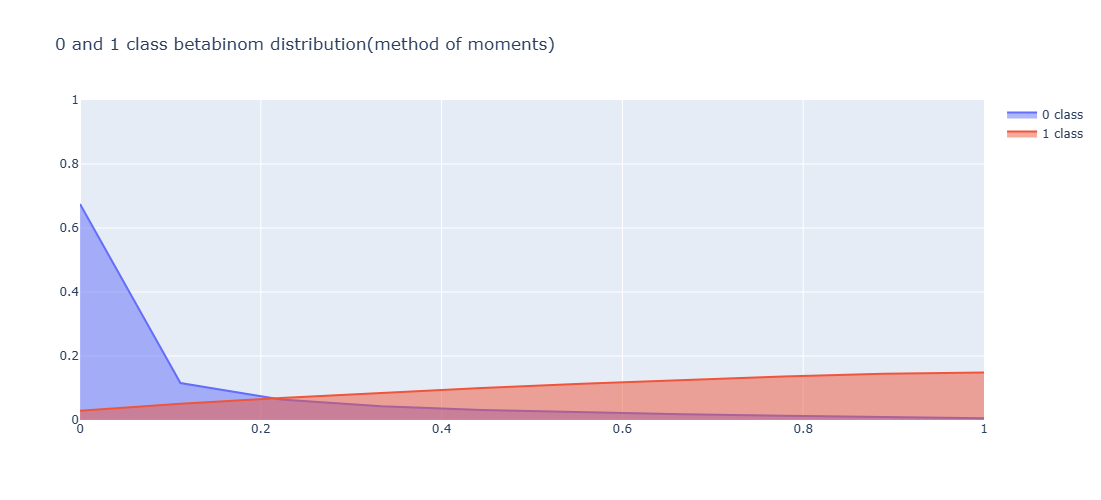

In [300]:
draw_betabinom_distr(betabinom_distr0, betabinom_distr1)

### To determine the probability of each class, we will use their proportion in the dataset.


In [301]:
p0_class, p1_class = (values_ == 0).mean(), (values_ != 0).mean()

In [302]:
p_error = get_prob_error_betabinom(betabinom_distr0, betabinom_distr1, p0_class, p1_class, threshold_rvr_placeholder)
p_error, 1. - p_error

(0.1474470081227579, 0.8525529918772421)

In [137]:
def get_betabinom_distribution(values, N=9):
    betabinom_xrange = np.linspace(0, 1, N + 1)
    values_bb = values_to_betabinom(values, betabinom_xrange)
    m1 = values_bb.mean()
    m2 = (values_bb ** 2).mean()
    if np.isnan(m1) or np.isnan(m2):
        m1 = 1.
        m2 = 1.
    alpha_bb = get_betabinom_alpha(m1, m2, N)
    beta_bb = get_betabinom_beta(m1, m2, N)
    
    return betabinom(N, alpha_bb, beta_bb), values_bb

In [179]:
def betabinom_stats_func(x, y):
    N = 9
    threshold = threshold_rvr_placeholder
    betabinom_xrange = np.linspace(0, 1, N + 1)
    
    betabinom_mm_0, eval_values_bb0 = get_betabinom_distribution(x, 9)
    betabinom_mm_1, eval_values_bb1 = get_betabinom_distribution(y, 9)
    
    p_error = p0_class * (betabinom_mm_0.pmf(np.arange(N + 1))[betabinom_xrange > threshold]).sum() +\
        p1_class * (betabinom_mm_1.pmf(np.arange(N + 1))[betabinom_xrange < threshold]).sum()
    return p_error

In [180]:
returns = bootstrap([red_nlis, nonred_nlis], betabinom_stats_func, method="percentile")

In [181]:
returns.confidence_interval.low, returns.confidence_interval.high

(0.0932230339672402, 0.20476881761393384)

### With 95% confidence, the classification error is between 0.091 and 0.203

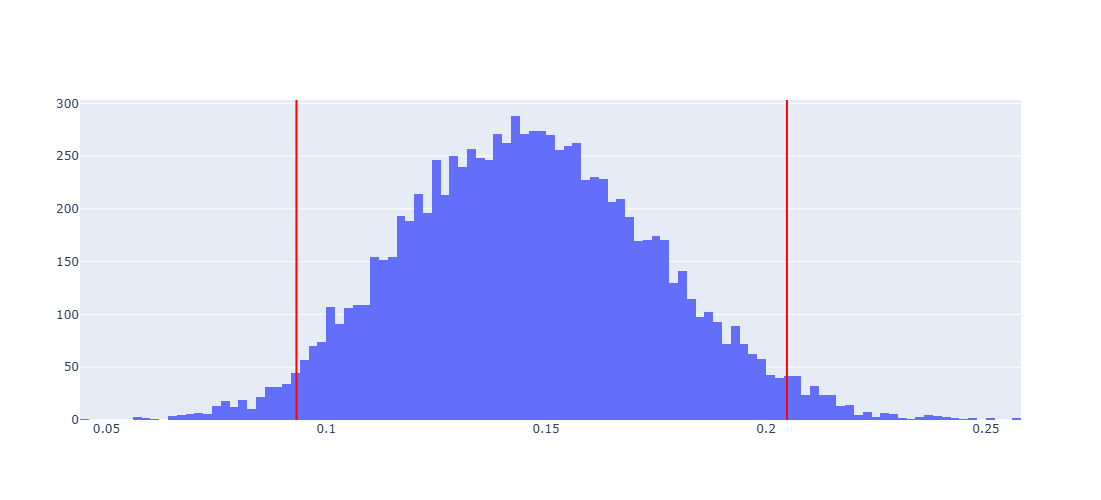

In [182]:
hist_with_ci(returns.bootstrap_distribution, returns.confidence_interval.low, returns.confidence_interval.high)

### Kolmogorov–Smirnov test: we cannot reject any 0 hypothesis for both 0 class and 1 class distribution. This means that we cannot reject the hypothesis that our distributions describe our data well.

In [96]:
rvs0 = betabinom_distr0.rvs(len(eval_values_bb0))

In [186]:
kstest(eval_values_bb0, rvs0)

KstestResult(statistic=0.1, pvalue=0.9900193288833089, statistic_location=0, statistic_sign=1)

In [187]:
kstest(eval_values_bb0, rvs0, alternative="less")

KstestResult(statistic=0.025, pvalue=0.975609756097561, statistic_location=4, statistic_sign=-1)

In [188]:
kstest(eval_values_bb0, rvs0, alternative="greater")

KstestResult(statistic=0.1, pvalue=0.6732178768480527, statistic_location=0, statistic_sign=1)

In [189]:
rvs1 = betabinom_distr1.rvs(len(eval_values_bb1))

In [190]:
kstest(eval_values_bb1, rvs1)

KstestResult(statistic=0.1111111111111111, pvalue=0.6378268536970463, statistic_location=3, statistic_sign=-1)

In [192]:
kstest(eval_values_bb1, rvs1, alternative="less")

KstestResult(statistic=0.1111111111111111, pvalue=0.33047621108672515, statistic_location=3, statistic_sign=-1)

In [191]:
kstest(eval_values_bb1, rvs1, alternative="greater")

KstestResult(statistic=0.05555555555555555, pvalue=0.7585238924076604, statistic_location=6, statistic_sign=1)

# Conclusion:

1. The quality heavily depends on the data provided. The more the ground truth answer resembles the expected answer, the better the quality.
2. Even with low-quality ground truth answers and complicated algorithm testing, it demonstrated satisfactory quality in distinguishing poor answers from the rest.

### Kolmogorov–Smirnov test: validation set vs test set(we cannot reject any 0 hypothesis, this means that we cannot reject that our datasets are from the one source)

In [263]:
kstest(res_metrics2[values_ == 0], res_metric2[df_eval["value"] == 0] )

KstestResult(statistic=0.225, pvalue=0.9089903413314593, statistic_location=0.18854166666666664, statistic_sign=-1)

In [374]:
kstest(res_metrics2[values_ != 0], res_metric2[df_eval["value"] != 0])

KstestResult(statistic=0.13450292397660818, pvalue=0.8970457861914701, statistic_location=0.6916666666666667, statistic_sign=1)

In [375]:
kstest(res_metrics2[values_ != 2], res_metric2[df_eval["value"] != 2])

KstestResult(statistic=0.14456035767511177, pvalue=0.9718194353724567, statistic_location=0.0625, statistic_sign=1)

In [373]:
kstest(res_metrics2[values_ == 2], res_metric2[df_eval["value"] == 2] )

KstestResult(statistic=0.2204968944099379, pvalue=0.5464307773430097, statistic_location=0.6666666666666666, statistic_sign=1)

### red + yellow vs green validation dataset

In [283]:
threshold_green_vs_rest = get_optimal_threshold(values_ > 1.5, res_metrics2)
threshold_green_vs_rest

0.4595959595959596

# Test set

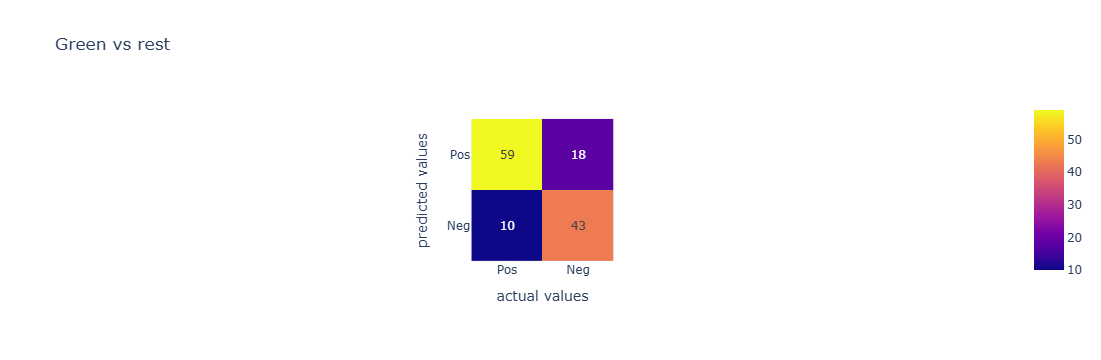

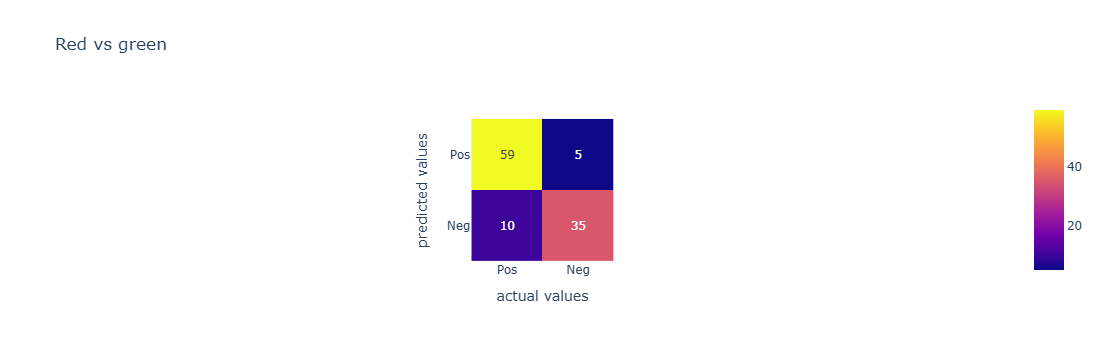

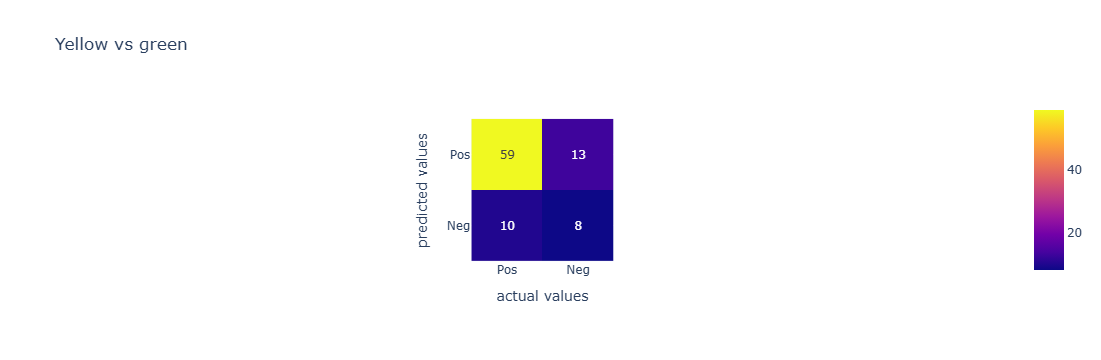

In [284]:
tn, fp, fn, tp = confusion_matrix(values_ > 1.5, res_metrics2 > threshold_green_vs_rest).ravel()
plot_confusion_matrix(tp, fp, fn, tn, "Green vs rest")
tn, fp, fn, tp = confusion_matrix((values_ > 1.5)[values_ != 1], (res_metrics2 > threshold_green_vs_rest)[values_ != 1]).ravel()
plot_confusion_matrix(tp, fp, fn, tn, "Red vs green")
tn, fp, fn, tp = confusion_matrix((values_ > 1.5)[values_ != 0], (res_metrics2 > threshold_green_vs_rest)[values_ != 0]).ravel()
plot_confusion_matrix(tp, fp, fn, tn, "Yellow vs green")

# Validation set

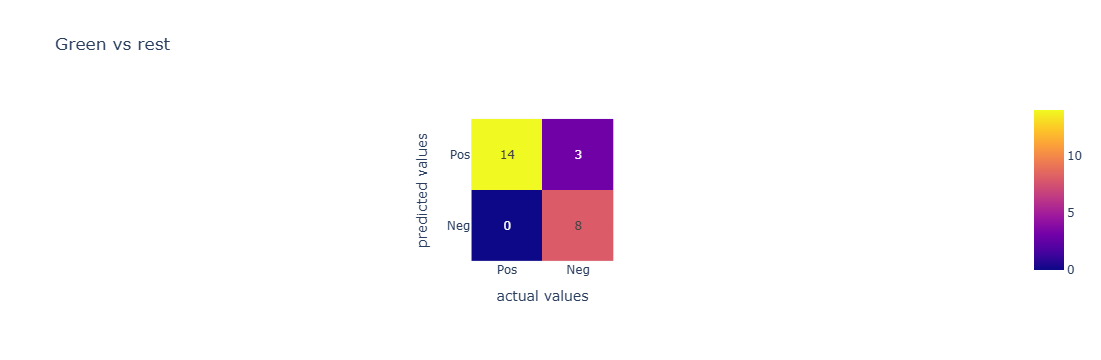

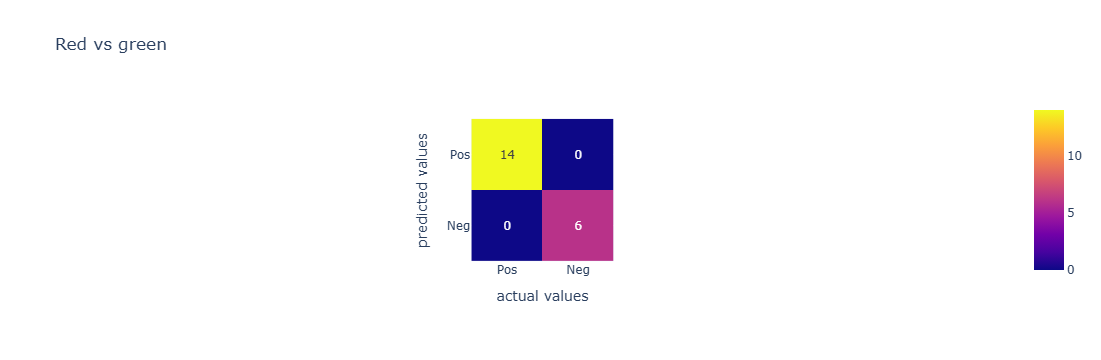

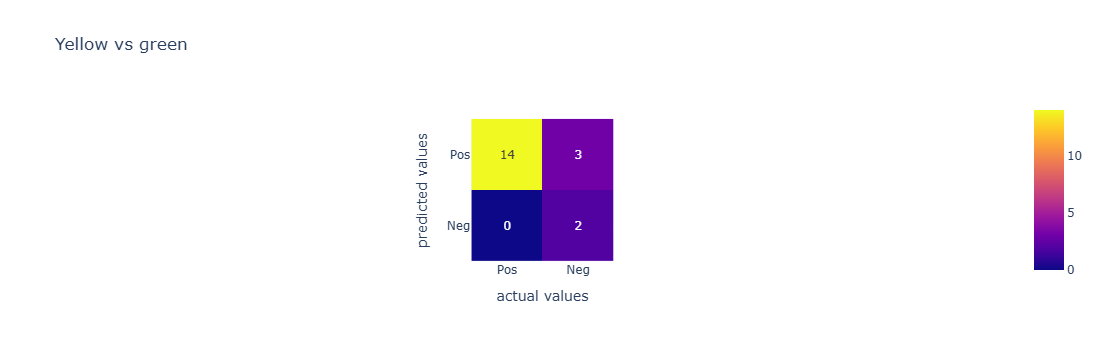

In [285]:
tn, fp, fn, tp = confusion_matrix(df_eval["value"] > 1.5, res_metric2 > threshold_green_vs_rest).ravel()
plot_confusion_matrix(tp, fp, fn, tn, "Green vs rest")
tn, fp, fn, tp = confusion_matrix((df_eval["value"] > 1.5)[df_eval["value"] != 1], (res_metric2 > threshold_green_vs_rest)[df_eval["value"] != 1]).ravel()
plot_confusion_matrix(tp, fp, fn, tn, "Red vs green")
tn, fp, fn, tp = confusion_matrix((df_eval["value"] > 1.5)[df_eval["value"] != 0], (res_metric2 > threshold_green_vs_rest)[df_eval["value"] != 0]).ravel()
plot_confusion_matrix(tp, fp, fn, tn, "Yellow vs green")

# Validation set(stats below)

In [286]:
# res_metric2 = res_metric2.values

### ROC AUC (mean_nli)

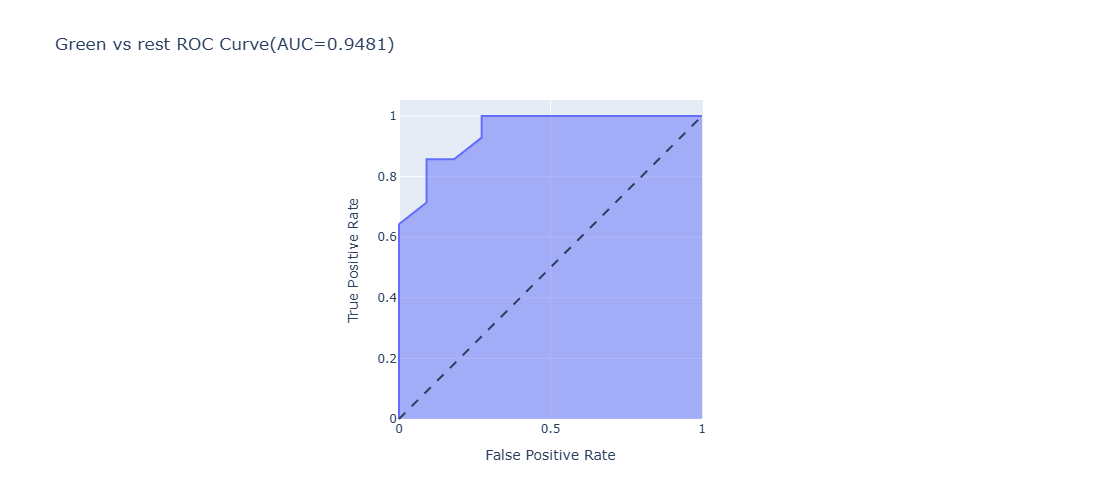

In [287]:
plot_roc_auc_curve(df_eval["value"] > 1.5, res_metric2, "Green vs rest ROC Curve")

In [288]:
scores, lb, ub = pair_bootstrap(df_eval["value"] > 1.5, res_metric2, 10000, one_class_roc_auc_score)
lb, ub

(0.8492063492063493, 1.0)

## Bootstrap AUC-ROC Score on the Validation Dataset(mean_nli)

We are 95 percent confident that the AUC-ROC score on a dataset of this nature ranges from 0.85 to 1.


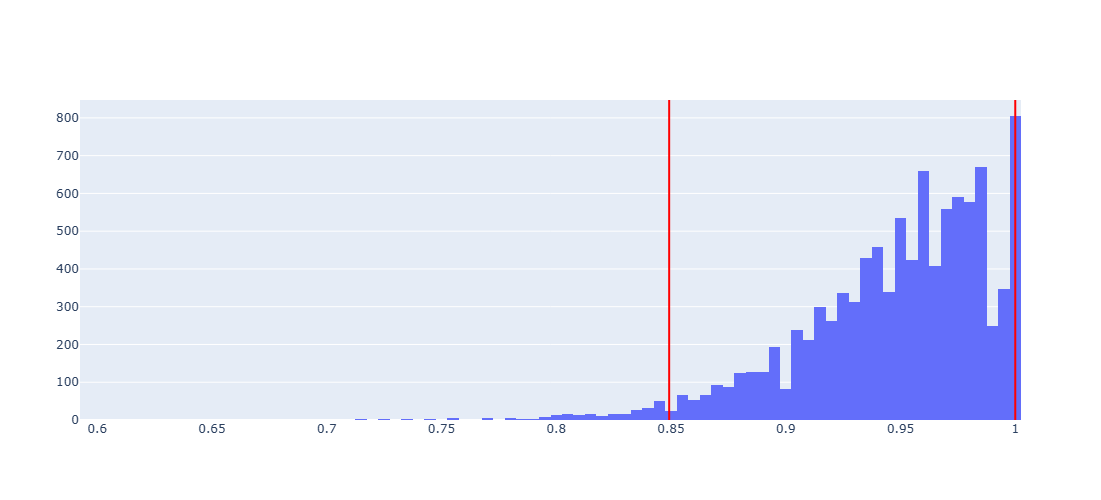

In [289]:
hist_with_ci(scores, lb, ub)

### accuracy(mean_nli)

In [290]:
accuracy_score(
    df_eval["value"] > 1.5, 
    res_metric2 > threshold_green_vs_rest,
)

0.88

In [291]:
scores, lb, ub = pair_bootstrap(
    df_eval["value"] > 1.5, 
    res_metric2 > threshold_green_vs_rest, 10000, accuracy_score
)
lb, ub

(0.7590000000000009, 1.0)

## Bootstrap Accuracy Score on the Test Sample(mean_nli)

We are 95% confident that the accuracy on a dataset of this nature varies from 0.76 to 1.0.


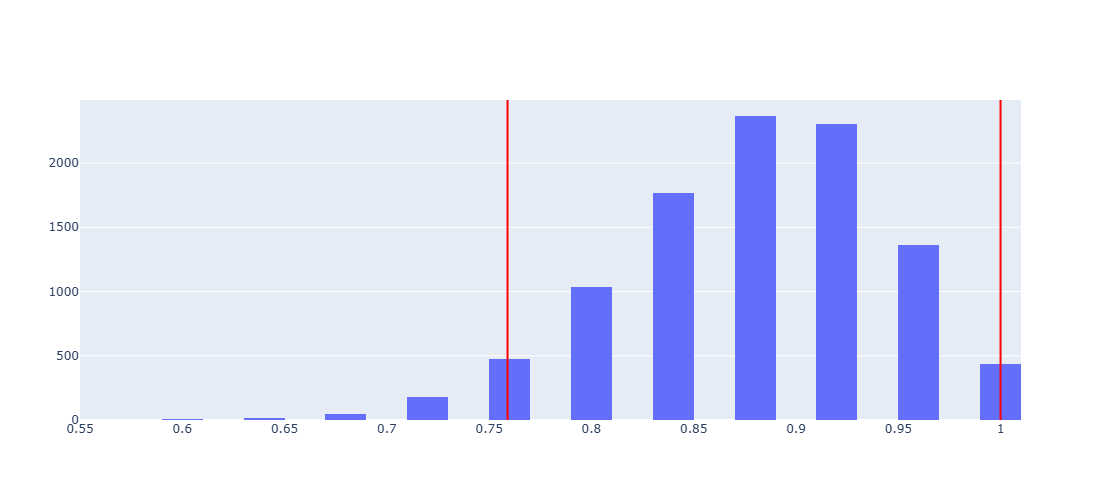

In [292]:
hist_with_ci(scores, lb, ub)

### mean_nli
- Proportion of correctly labeled pairs: 0.94
- Proportion of incorrectly labeled pairs: 0.06

Among the incorrectly labeled pairs:
- Proportion with the same NLI: 0.015
- Proportion where the worse answer has a higher NLI: 0.045

In [260]:
((res_metric2[df_eval["value"] != 2][:, None] - res_metric2[df_eval["value"] == 2][None, :]).ravel() < 0).mean(),\
((res_metric2[df_eval["value"] != 2][:, None] - res_metric2[df_eval["value"] == 2][None, :]).ravel() > 0).mean()

(0.9415584415584416, 0.045454545454545456)

# beta-binom distribution

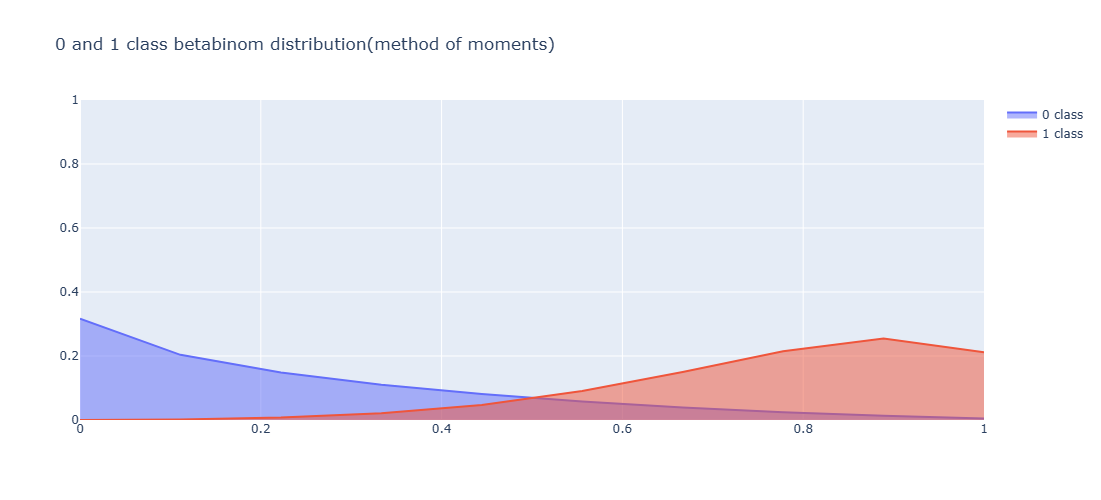

In [265]:
nongreen_nlis = res_metric2[df_eval["value"] != 2]
green_nlis = res_metric2[df_eval["value"] == 2]
betabinom_distr0, eval_values_bb0 = get_betabinom_distribution(nongreen_nlis, 9)
betabinom_distr1, eval_values_bb1 = get_betabinom_distribution(green_nlis, 9)
draw_betabinom_distr(betabinom_distr0, betabinom_distr1)

# classification error

In [267]:
p0_class, p1_class = (df_eval["value"] != 2).mean(), (df_eval["value"] == 2).mean()
p_error = get_prob_error_betabinom(betabinom_distr0, betabinom_distr1, p0_class, p1_class, threshold_green_vs_rest)
p_error, 1. - p_error

(0.104864396678605, 0.895135603321395)

In [269]:
def betabinom_stats_func(x, y):
    N = 9
    threshold = threshold_green_vs_rest
    betabinom_xrange = np.linspace(0, 1, N + 1)
    
    betabinom_mm_0, eval_values_bb0 = get_betabinom_distribution(x, 9)
    betabinom_mm_1, eval_values_bb1 = get_betabinom_distribution(y, 9)
    
    p_error = p0_class * (betabinom_mm_0.pmf(np.arange(N + 1))[betabinom_xrange > threshold]).sum() +\
        p1_class * (betabinom_mm_1.pmf(np.arange(N + 1))[betabinom_xrange < threshold]).sum()
    return p_error

In [270]:
returns = bootstrap([nongreen_nlis, green_nlis], betabinom_stats_func, method="percentile")
returns.confidence_interval.low, returns.confidence_interval.high

(nan, nan)

# not enough data

# Power Analysis

In [185]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 12.9 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [228]:
np.mean(nonred_nlis), np.mean(red_nlis)

(0.6300482465065799, 0.11395337301587301)

In [315]:
from scipy.stats import shapiro

In [316]:
shapiro(nonred_nlis)

ShapiroResult(statistic=0.9300038339219042, pvalue=0.00011851478747878007)

In [317]:
shapiro(red_nlis)

ShapiroResult(statistic=0.6061434682681435, pvalue=3.798398621360012e-09)

In [321]:
generated_means_nonred = [np.random.choice(nonred_nlis, nonred_nlis.shape[0], replace=True).mean() for i in range(1000)]
shapiro(generated_means_nonred)

ShapiroResult(statistic=0.9977587497331939, pvalue=0.1957032826829495)

In [322]:
generated_means_red = [np.random.choice(red_nlis, nonred_nlis.shape[0], replace=True).mean() for i in range(1000)]
shapiro(generated_means_red)

ShapiroResult(statistic=0.9917198883009516, pvalue=2.126304859536819e-05)

In [380]:
from statsmodels.stats.power import TTestIndPower

effect_size = np.mean(nonred_nlis) - np.mean(red_nlis)
alpha = 0.05
power = 0.9
ratio = red_nlis.shape[0] / nonred_nlis.shape[0]

In [381]:
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

In [382]:
print(sample_size)

129.55381751007803


In [384]:
130 * ratio

57.77777777777777

In [222]:
71.06718656677661 + 159.90116977524738

230.96835634202398

In [219]:
140 / 52

2.6923076923076925

In [220]:
red_nlis.shape[0] + nonred_nlis.shape[0]

130

In [212]:
sample_sizes = dict()
for fn1, fn2 in quality_pairs:
    effect_size = np.abs(rag_pred_quality[fn2] - rag_pred_quality[fn1])
    alpha = 0.05
    power = 0.8
    ratio = 1
    sample_sizes[(fn1, fn2)] = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

In [213]:
sample_sizes

{('chat_gpt4o.parquet', 'dial_rag_gpt4omini.parquet'): 402.2095878914052,
 ('chat_gpt4o.parquet', 'gemini_pro_1.5.parquet'): 1560.9559250406385,
 ('chat_gpt4o.parquet', 'ms_copilot.parquet'): 639.8151883671557,
 ('gemini_pro_1.5.parquet', 'dial_rag_gpt4omini.parquet'): 1652.9166395768364,
 ('ms_colpilot_licenced.parquet', 'chat_gpt4o.parquet'): 2015.6261335808404,
 ('ms_colpilot_licenced.parquet',
  'dial_rag_gpt4omini.parquet'): 192.7916883041377,
 ('ms_colpilot_licenced.parquet', 'gemini_pro_1.5.parquet'): 442.3586154464157,
 ('ms_colpilot_licenced.parquet', 'ms_copilot.parquet'): 262.4314189393938,
 ('ms_copilot.parquet', 'dial_rag_gpt4omini.parquet'): 9321.07869266416}

In [412]:
from tqdm import tqdm

# roc auc score(bootstrap)

In [467]:
spans = []
sizes = np.arange(10, 400, 10, dtype=int)
for size in tqdm(sizes):
    scores, lb, ub = pair_bootstrap(values_ > 0.5, metrics_placeholder2, 2000, one_class_roc_auc_score, size=size)
    spans.append(ub - lb)

100%|███████████████████████████████████████████████████████████████████████████████████| 39/39 [01:28<00:00,  2.26s/it]


In [468]:
from scipy.ndimage import gaussian_filter

In [469]:
# to_draw_log_spans = gaussian_filter(np.log(spans), sigma=0.5)
to_draw_log_spans = np.log(spans)

In [470]:
fig = go.Figure(data=go.Scatter(x=sizes, y=spans))
fig.show()

# log spans

In [450]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scatter(x=sizes, y=to_draw_log_spans))
fig.show()

# 2 finite derivative log spans(+smoothering)

In [451]:
d2f_dx2 = gaussian_filter(to_draw_log_spans[:-2] + to_draw_log_spans[2:] - 2 * to_draw_log_spans[1:-1], sigma=2.)
fig = go.Figure(data=go.Scatter(x=sizes[1:-1], y=d2f_dx2))
fig.show()

# accuracy(bootstrap)

In [452]:
spans = []
sizes = np.arange(10, 400, 10, dtype=int)
for size in tqdm(sizes):
    scores, lb, ub = pair_bootstrap(values_ > 0.5, metrics_placeholder2 > threshold_rvr_placeholder2, 2000, accuracy_score, size=size)
    spans.append(ub - lb)

100%|███████████████████████████████████████████████████████████████████████████████████| 39/39 [00:23<00:00,  1.69it/s]


In [ ]:
fig = go.Figure(data=go.Scatter(x=sizes, y=spans))
fig.show()

In [453]:
to_draw_log_spans = np.log(spans)

# log spans

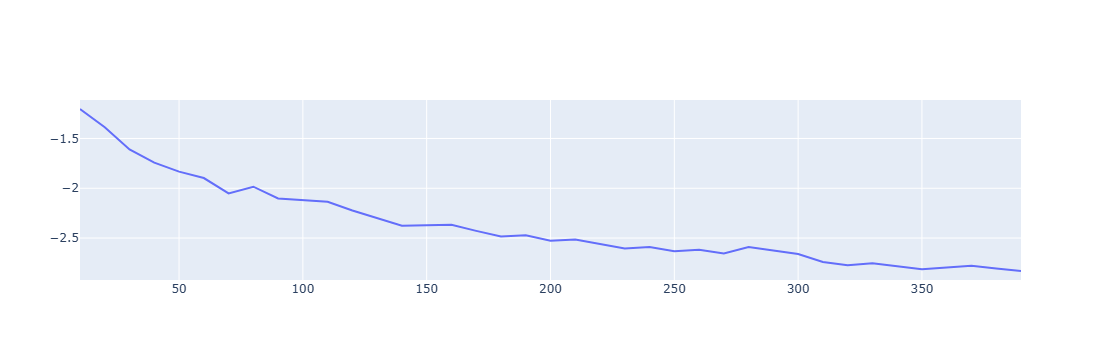

In [454]:
fig = go.Figure(data=go.Scatter(x=sizes, y=to_draw_log_spans))
fig.show()

# 2 finite derivative log spans(+smoothering)

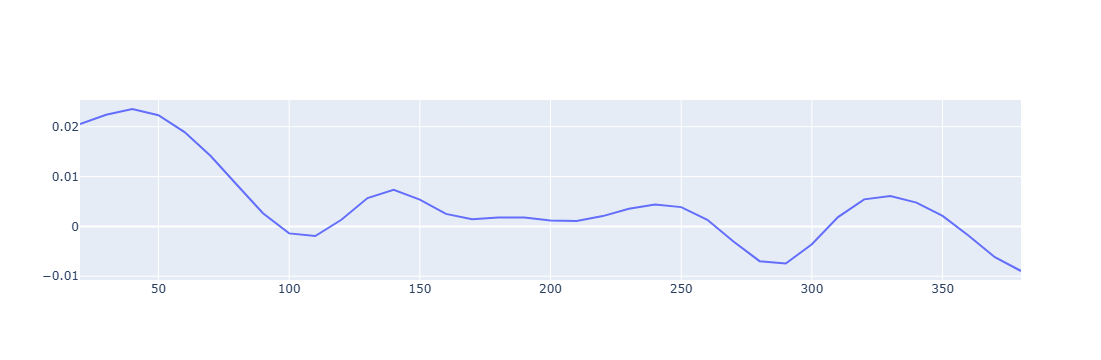

In [455]:
d2f_dx2 = gaussian_filter(to_draw_log_spans[:-2] + to_draw_log_spans[2:] - 2 * to_draw_log_spans[1:-1], sigma=2.)
fig = go.Figure(data=go.Scatter(x=sizes[1:-1], y=d2f_dx2))
fig.show()

In [456]:
red_nlis_generated = betabinom_distr0.rvs(int(20000 * len(red_nlis) / (len(nonred_nlis) + len(red_nlis))))

In [457]:
nonred_nlis_generated = betabinom_distr1.rvs(int(20000 * len(nonred_nlis) / (len(nonred_nlis) + len(red_nlis))))

In [458]:
values_generated = np.concatenate([np.zeros(len(red_nlis_generated), dtype=int), np.ones(len(nonred_nlis_generated), dtype=int)])
metrics_generated = np.concatenate([red_nlis_generated, nonred_nlis_generated])

# auc roc score(monte carlo)

In [459]:
spans = []
sizes = np.arange(10, 400, 10, dtype=int)
for size in tqdm(sizes):
    scores, lb, ub = pair_bootstrap(values_generated > 0.5, metrics_generated, 2000, one_class_roc_auc_score, size=size)
    spans.append(ub - lb)

100%|███████████████████████████████████████████████████████████████████████████████████| 39/39 [01:16<00:00,  1.97s/it]


In [460]:
to_draw_log_spans = np.log(spans)

# log spans

In [461]:
fig = go.Figure(data=go.Scatter(x=sizes, y=to_draw_log_spans))
fig.show()

# 2 finite derivative log spans(+smoothering)

In [462]:
d2f_dx2 = gaussian_filter(to_draw_log_spans[:-2] + to_draw_log_spans[2:] - 2 * to_draw_log_spans[1:-1], sigma=2.)
fig = go.Figure(data=go.Scatter(x=sizes[1:-1], y=d2f_dx2))
fig.show()

# accuracy(monte carlo)

In [463]:
spans = []
sizes = np.arange(10, 400, 10, dtype=int)
for size in tqdm(sizes):
    scores, lb, ub = pair_bootstrap(values_generated > 0.5, metrics_generated > threshold_rvr_placeholder2, 2000, accuracy_score, size=size)
    spans.append(ub - lb)

100%|███████████████████████████████████████████████████████████████████████████████████| 39/39 [00:24<00:00,  1.61it/s]


# log spans

In [464]:
to_draw_log_spans = np.log(spans)
fig = go.Figure(data=go.Scatter(x=sizes, y=to_draw_log_spans))
fig.show()

# 2 finite derivative log spans(+smoothering)

In [465]:
d2f_dx2 = gaussian_filter(to_draw_log_spans[:-2] + to_draw_log_spans[2:] - 2 * to_draw_log_spans[1:-1], sigma=2.)
fig = go.Figure(data=go.Scatter(x=sizes[1:-1], y=d2f_dx2))
fig.show()

In [466]:
def get_ci_lb_ub(n_size=1, N = 10000):
    quality_results = []
    for _ in range(N):
        dataset_stats = []
        choice_idxes = np.random.choice(np.arange(evals_with_values["chat_gpt4o.parquet"].shape[0]), n_size)
        for i in range(5):
            metrics_sample, values_sample = metrics_matrix[:, i], values_matrix[:, i]
            metrics_sample, values_sample = metrics_sample[choice_idxes], values_sample[choice_idxes]
            dataset_stats.append((metrics_sample.mean(), (values_sample != 0).mean()))
        
        results = []
        for i in range(1, 5):
            for j in range(0, i):
                results.append((dataset_stats[i][0] < dataset_stats[j][0]) == (dataset_stats[i][1] < dataset_stats[j][1]))
        quality_results.append(np.mean(results))
    lb = np.percentile(quality_results, 2.5)
    ub = np.percentile(quality_results, 97.5)
    return quality_results, lb, ub

In [471]:
spans = []
sizes = np.arange(2, 300, 2, dtype=int)
for size in tqdm(sizes):
    scores, lb, ub = get_ci_lb_ub(size, 1000)
    spans.append(ub - lb)

100%|█████████████████████████████████████████████████████████████████████████████████| 149/149 [00:15<00:00,  9.72it/s]


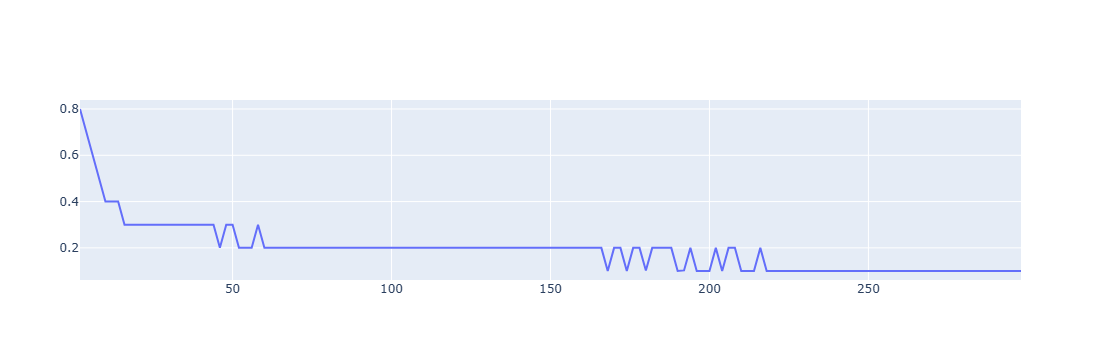

In [473]:
fig = go.Figure(data=go.Scatter(x=sizes, y=spans))
fig.show()

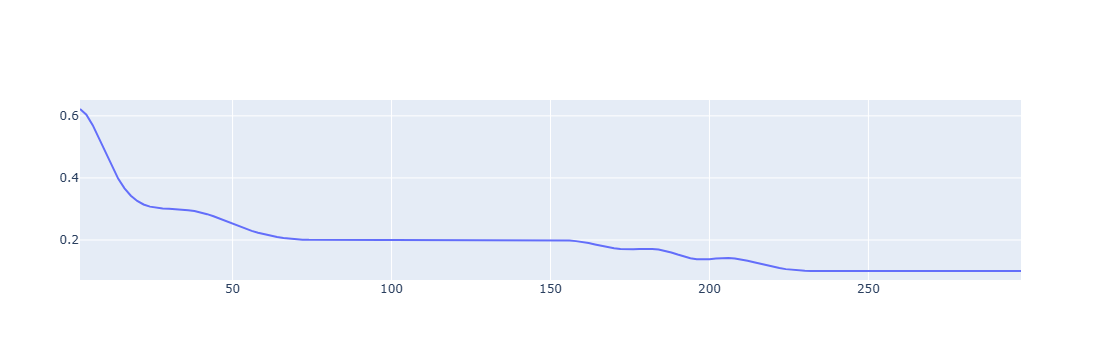

In [475]:
fig = go.Figure(data=go.Scatter(x=sizes, y=gaussian_filter(spans, 3)))
fig.show()

In [444]:
def get_ci_lb_ub_2rag(n_size=1, N = 10000):
    quality_results = []
    for _ in range(N):
        dataset_stats = []
        choice_idxes = np.random.choice(np.arange(evals_with_values["chat_gpt4o.parquet"].shape[0]), n_size)
        for i in range(5):
            dataset_stats.append(make_dataset_stats(choice_idxes))
        
        results = []
        for i in range(1, 5):
            for j in range(0, i):
                results.append((dataset_stats[i][0] < dataset_stats[j][0]) == (dataset_stats[i][1] < dataset_stats[j][1]))
        quality_results.append(np.mean(results))
    lb = np.percentile(quality_results, 2.5)
    ub = np.percentile(quality_results, 97.5)
    return quality_results, lb, ub

In [445]:
spans = []
sizes = np.arange(2, 300, 2, dtype=int)
for size in tqdm(sizes):
    scores, lb, ub = get_ci_lb_ub_2rag(size, 1000)

    spans.append(ub - lb)

100%|█████████████████████████████████████████████████████████████████████████████████| 149/149 [00:20<00:00,  7.10it/s]


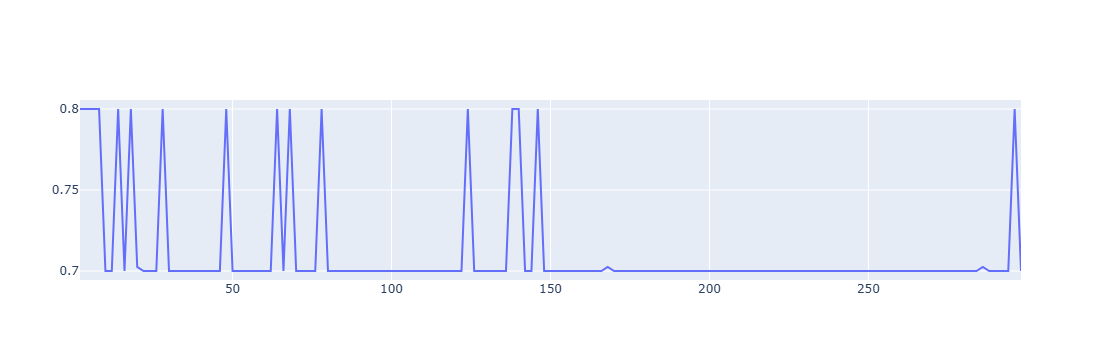

In [446]:
fig = go.Figure(data=go.Scatter(x=sizes, y=spans))
fig.show()